<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/logica_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=df18792506f6d4b66fcc9614d12572186d950600f58750479f45154a41fefca1
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [ ]:
peso = ctrl.Antecedent(np.arange(20,120,1), 'peso')
altura = ctrl.Antecedent(np.arange(1.2, 2, 0.1), 'altura')
tamanho = ctrl.Consequent(np.arange(0, 1, .1), 'tamanho')

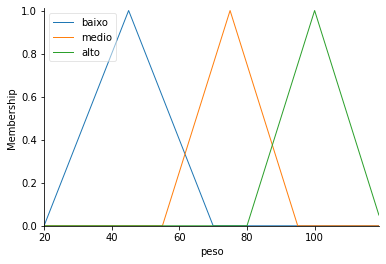

In [ ]:
peso['baixo'] = fuzz.trimf(peso.universe, [20,45,70])
peso['medio'] = fuzz.trimf(peso.universe, [55,75,95])
peso['alto'] = fuzz.trimf(peso.universe, [80,100,120])
peso.view()

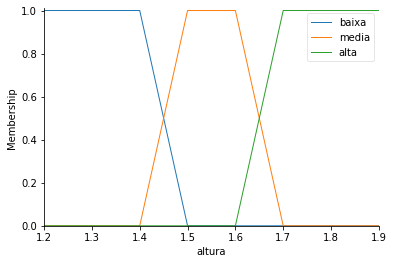

In [ ]:
altura['baixa'] = fuzz.trapmf(altura.universe, [1.2,1.2,1.4,1.5])
altura['media'] = fuzz.trapmf(altura.universe, [1.4,1.5,1.6,1.7])
altura['alta'] = fuzz.trapmf(altura.universe, [1.68,1.7,2,2])
altura.view()

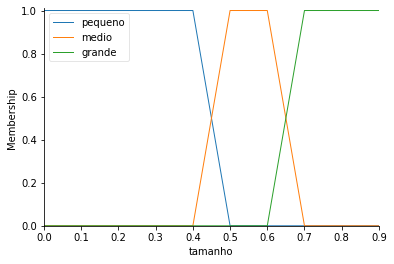

In [ ]:
tamanho['pequeno'] = fuzz.trapmf(tamanho.universe, [0,0,0.4,0.5])
tamanho['medio'] = fuzz.trapmf(tamanho.universe, [0.4,0.5,0.6,0.7])
tamanho['grande'] = fuzz.trapmf(tamanho.universe, [0.65,0.7,1,1])
tamanho.view()

In [ ]:
regra1 = ctrl.Rule(peso['baixo'], tamanho['pequeno'])

regra2 = ctrl.Rule(altura['media'] | peso['medio'], tamanho['medio'])

regra3 = ctrl.Rule(altura['alta'] & peso['alto'], tamanho['grande'])

In [ ]:
fuzzy_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(fuzzy_ctrl)

0.23531914893617137


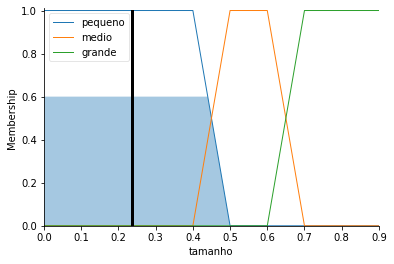

In [ ]:
peso_entrada = 35
altura_entrada = 1.7

engine.input['peso'] = peso_entrada
engine.input['altura'] = altura_entrada

engine.compute()

print(engine.output['tamanho'])
tamanho.view(sim=engine)

# **ATIVIDADE UTILIZANDO O EXERCÍCIO DA AULA ANTERIOR**

In [ ]:
ph = ctrl.Antecedent(np.arange(0,14,.1), 'ph')
umidade = ctrl.Antecedent(np.arange(0, 1000, 10), 'umidade')
irrigacaoNutritiva = ctrl.Consequent(np.arange(0, 1, .1), 'irrigacaoNutritiva')

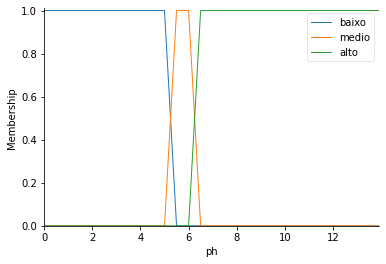

In [ ]:
ph['baixo'] = fuzz.trapmf(ph.universe, [0,0,5,5.5])
ph['medio'] = fuzz.trapmf(ph.universe, [5,5.5,6,6.5])
ph['alto'] = fuzz.trapmf(ph.universe, [6,6.5,14,14])
ph.view()

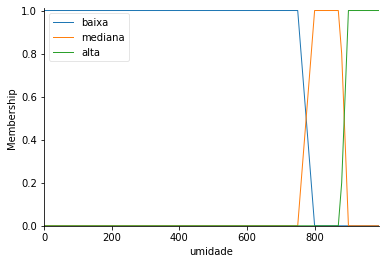

In [ ]:
umidade['baixa'] = fuzz.trapmf(umidade.universe, [0,0,750,800])
umidade['mediana'] = fuzz.trapmf(umidade.universe, [750,800,875,900])
umidade['alta'] = fuzz.trapmf(umidade.universe, [875,900,1000,1000])
umidade.view()

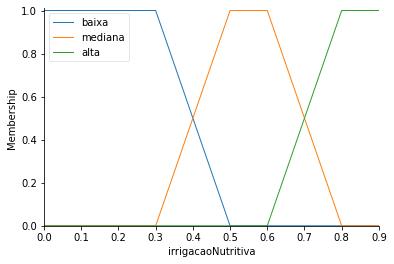

In [ ]:
irrigacaoNutritiva['baixa'] = fuzz.trapmf(irrigacaoNutritiva.universe, [0,0,0.3,0.5])
irrigacaoNutritiva['mediana'] = fuzz.trapmf(irrigacaoNutritiva.universe, [0.3,0.5,0.6,0.8])
irrigacaoNutritiva['alta'] = fuzz.trapmf(irrigacaoNutritiva.universe, [0.6,0.8,1,1])
irrigacaoNutritiva.view()

In [ ]:
regraPh1 = ctrl.Rule(ph['baixo'] & (umidade['mediana'] | umidade['baixa']), irrigacaoNutritiva['alta'])

regraUmidade2 = ctrl.Rule(umidade['baixa'], irrigacaoNutritiva['mediana'])

In [ ]:
fuzzy_ctrl_irrigacao = ctrl.ControlSystem([regraPh1, regraUmidade2])
engine = ctrl.ControlSystemSimulation(fuzzy_ctrl_irrigacao)

Insira o PH do solo:4
Insira a umidade do solo:500
Irigação nutritiva: 0.6407407407407407


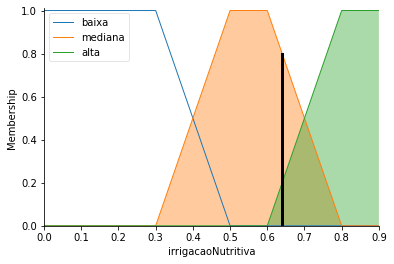

In [ ]:
ph_entrada = float(input('Insira o PH do solo: '))
umidade_entrada = float(input('Insira a umidade do solo: '))

engine.input['ph'] = ph_entrada
engine.input['umidade'] = umidade_entrada

engine.compute()

print('Irigação nutritiva: ' + str(engine.output['irrigacaoNutritiva']))
irrigacaoNutritiva.view(sim=engine)